# 1. Download the dataset

Churn_Modelling.csv

# 2. Load the dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"Churn_Modelling.csv")

In [25]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# 3. Basic Virtualizations

In [3]:
import seaborn as sns

## Univarient Analysis

<AxesSubplot:xlabel='CreditScore', ylabel='Count'>

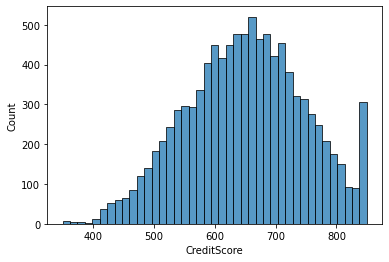

In [4]:
sns.histplot(df["CreditScore"])

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CreditScore', ylabel='Density'>

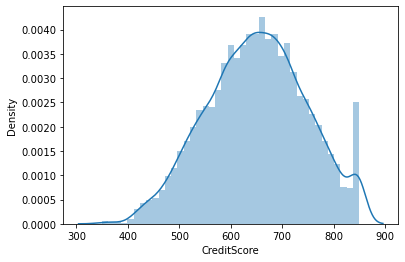

In [5]:
sns.distplot(df["CreditScore"])

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CreditScore'>

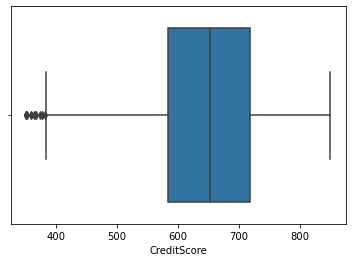

In [6]:
sns.boxplot(df["CreditScore"])

## Bi-Varient Analysis

<AxesSubplot:xlabel='Gender', ylabel='Age'>

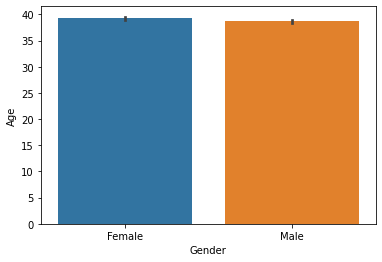

In [10]:
sns.barplot(x="Gender",y="Age",data=df )

<AxesSubplot:xlabel='Gender', ylabel='CreditScore'>

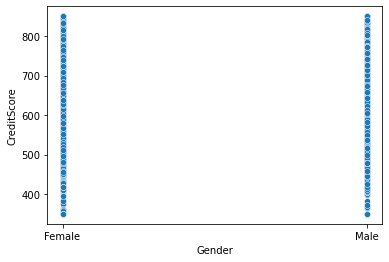

In [11]:
sns.scatterplot(x="Gender",y="CreditScore",data=df)

## Multi-Varient Analysis

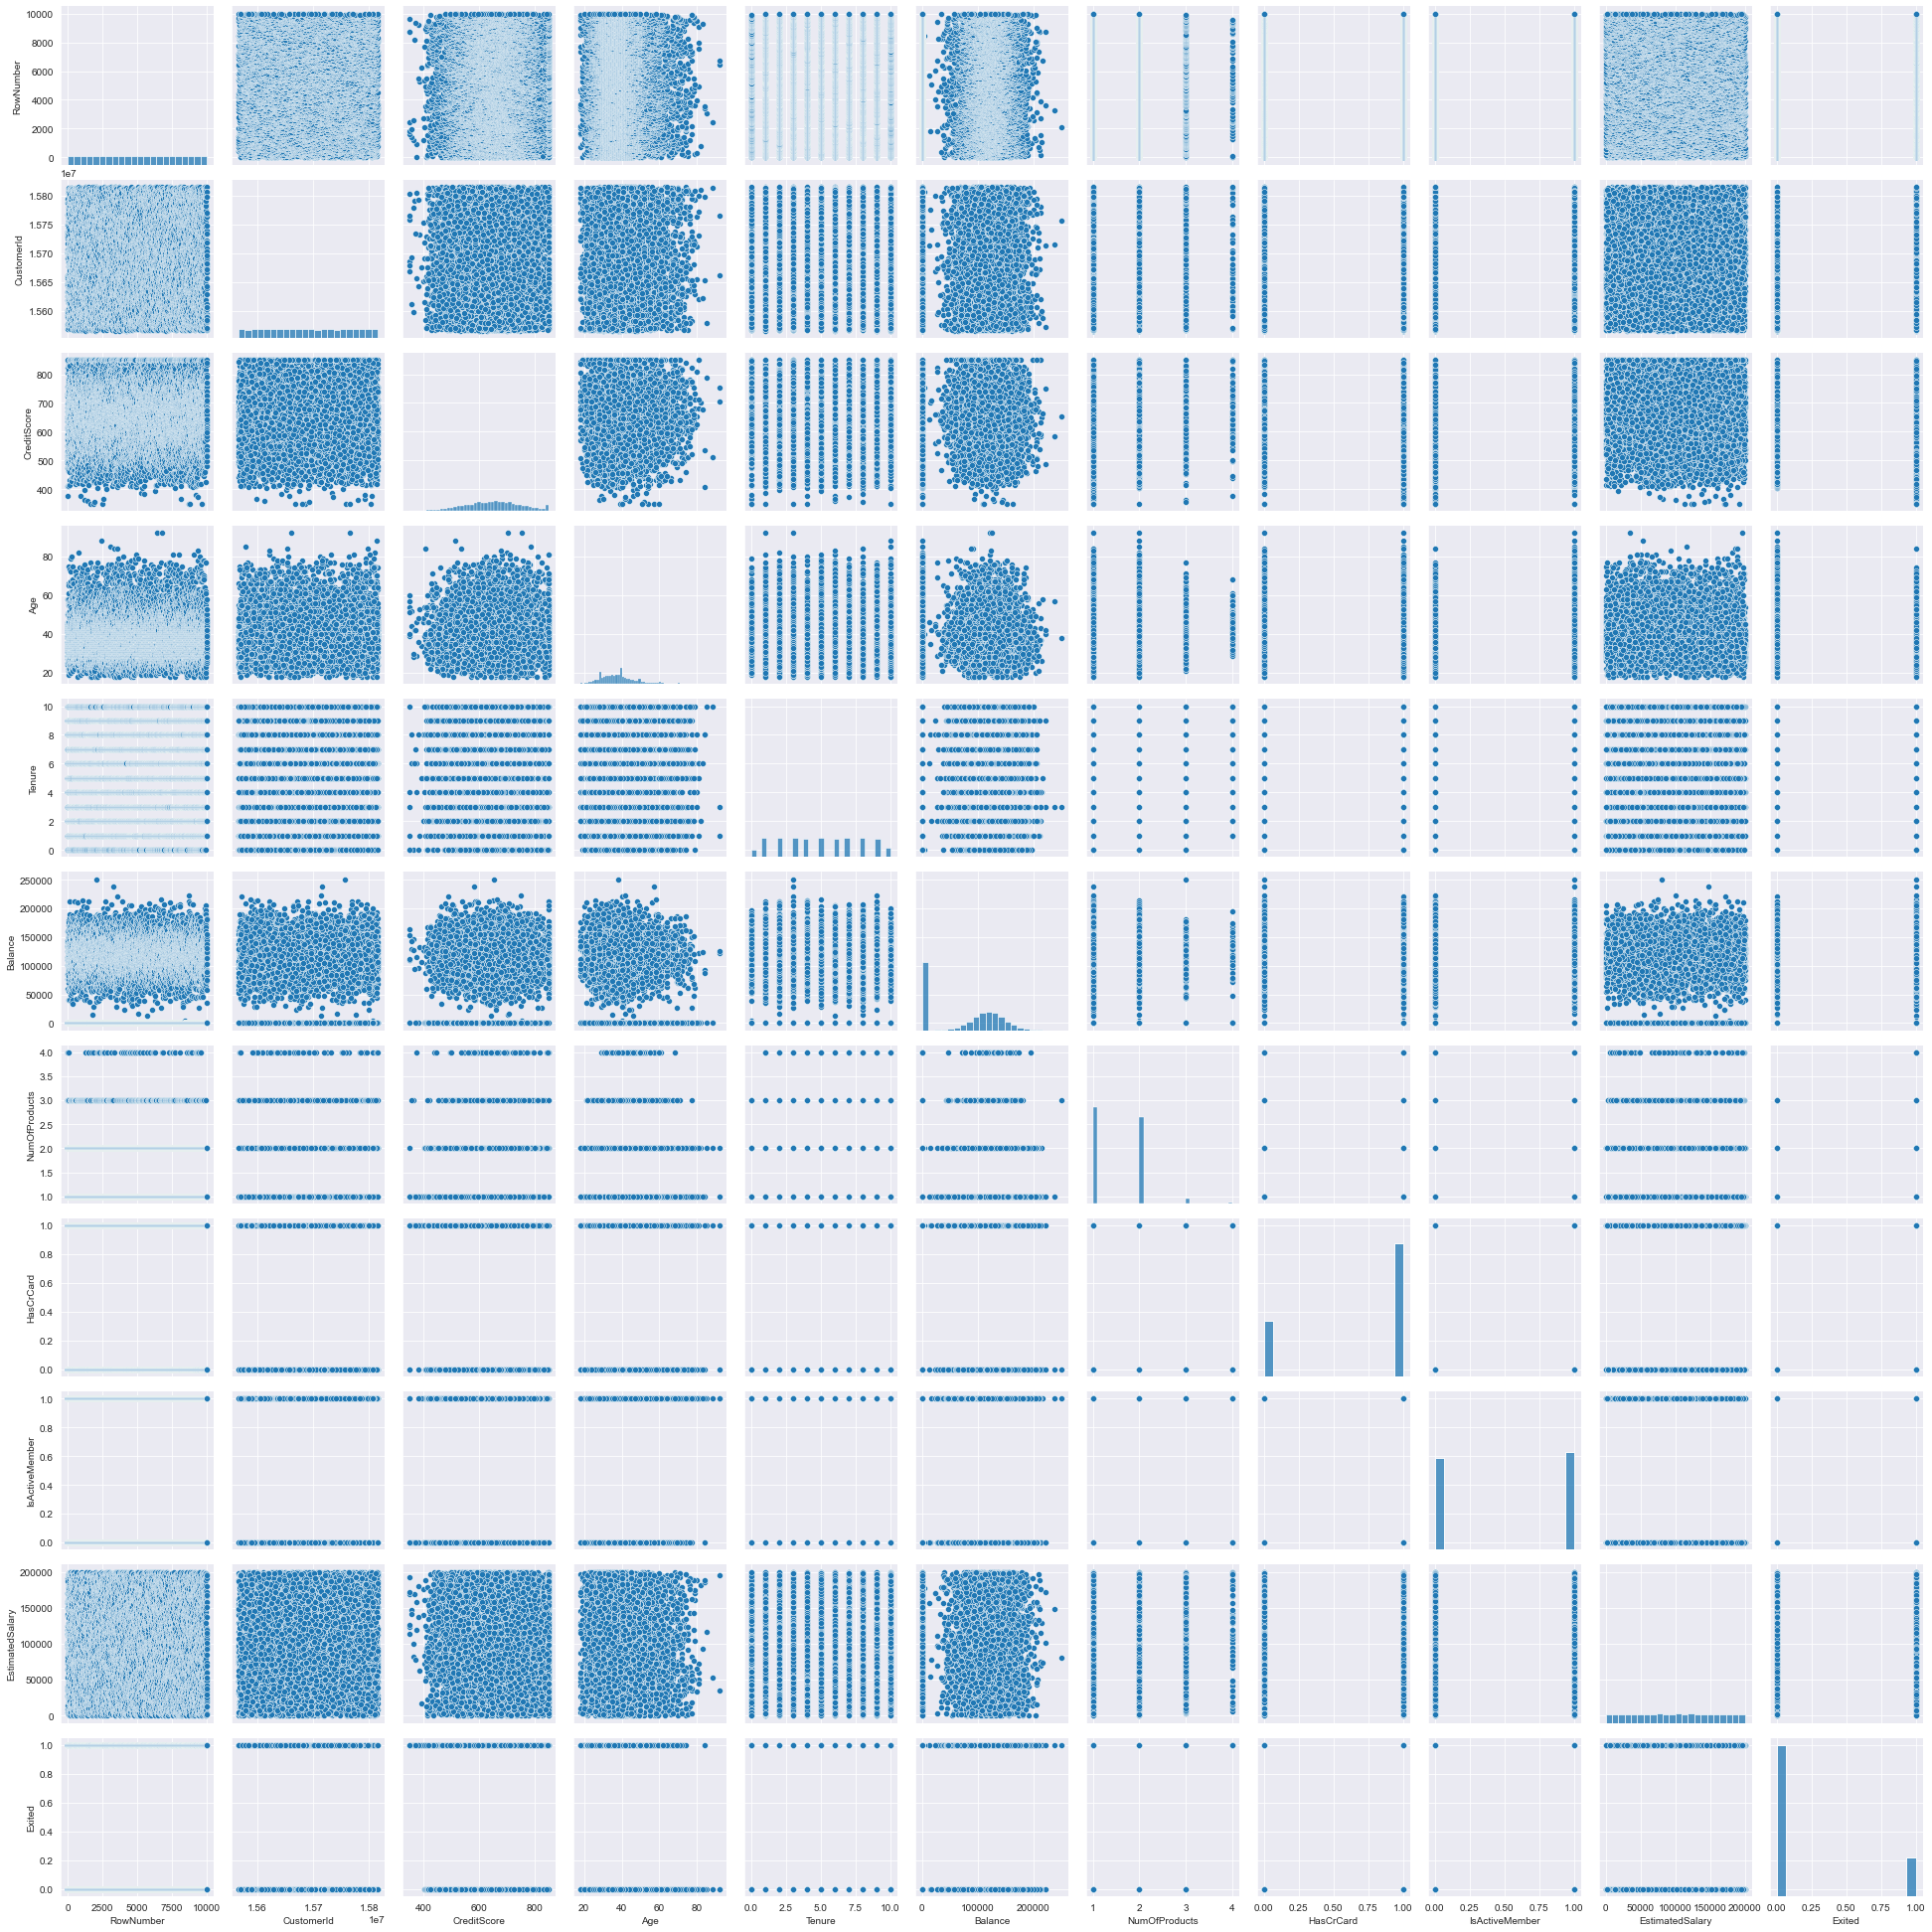

In [17]:
sns.pairplot(df)

# 4. Descriptive Statistics

In [18]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# 5. Handling the Missing Values

In [20]:
df.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

# 6. Find the Outliers and Replace the Outliers

In [21]:
df.skew()

C:\Users\Surya\AppData\Local\Temp\ipykernel_10148\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


RowNumber          0.000000
CustomerId         0.001149
CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

# 7. Categorical columns

In [100]:
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [101]:
df["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [102]:
df.shape

(10000, 14)

# 8. Dependent and Independent variables

In [103]:
x = df.iloc[:,3:13].values   
x.shape

(10000, 10)

In [104]:
y = df.iloc[:,13:14].values
y.shape

(10000, 1)

In [105]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [106]:
ct = ColumnTransformer([("oh",OneHotEncoder(),[1,2])],remainder="passthrough")

In [107]:
x = ct.fit_transform(x)

In [108]:
x.shape

(10000, 13)

# 9. Scale the Independent variables

In [110]:
y.shape

(10000, 1)

In [115]:
import joblib
joblib.dump(ct,"ChurnModel.pkl")

['ChurnModel.pkl']

# 10. Split Train and Test

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [118]:
x_train.shape

(8000, 13)

In [120]:
x_test.shape

(2000, 13)